<a href="https://colab.research.google.com/github/shayan911/Face-Classification/blob/main/Face_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras==2.0.0
!pip install tensorflow==1.14.0
!pip install scikit-learn==0.20

     |████████████████████████████████| 191 kB 24.9 MB/s 
     |████████████████████████████████| 495.0 MB 27 kB/s 
     |████████████████████████████████| 489.6 MB 26 kB/s 
     |████████████████████████████████| 463.8 MB 33 kB/s 
     |████████████████████████████████| 458.3 MB 13 kB/s 
     |████████████████████████████████| 458.3 MB 14 kB/s 
     |████████████████████████████████| 14.8 MB 51.4 MB/s 
     |████████████████████████████████| 462 kB 75.1 MB/s 
     |████████████████████████████████| 132 kB 78.6 MB/s 
     |████████████████████████████████| 458.3 MB 12 kB/s 
     |████████████████████████████████| 460.3 MB 9.0 kB/s 
     |████████████████████████████████| 462 kB 74.4 MB/s 
     |████████████████████████████████| 4.0 MB 44.0 MB/s 
     |████████████████████████████████| 1.2 MB 51.8 MB/s 
  Created wheel for keras: filename=Keras-2.0.0-py3-none-any.whl size=227982 sha256=e178b12052ca4a51902c137841daed6d8b4341dd03038f194f7c4d5fa7937061
  Stored in directory: /root/.cache/p

     |████████████████████████████████| 109.3 MB 62 kB/s 
     |████████████████████████████████| 488 kB 63.4 MB/s 
     |████████████████████████████████| 3.1 MB 55.3 MB/s 
     |████████████████████████████████| 50 kB 8.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.5.3
    Uninstalling tensorflow-2.5.3:
      Successfully uninstalled tensorflow-2.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.7 requires tensorflow>=2.0.0, but you

In [2]:
pip list

Package                       Version
----------------------------- ---------------------
absl-py                       0.15.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.2.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.12.0
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.4.0
audioread                     2.1.9
autograd                      1.4
Babel                         2.10.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.0
blis                          0.4.1
bokeh                         2.3.3
Bottleneck                    1.3.4
branca                        0.5.0
bs4                           0.0.1
Cach

In [1]:
from __future__ import print_function

import numpy as np
import warnings

from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.imagenet_utils import _obtain_input_shape # this will work for older versions of keras. 2.2.0 or before
from keras.engine.topology import get_source_inputs

Using TensorFlow backend.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:
def VGGupdated(input_tensor=None,classes=2):    
   
    img_rows, img_cols = 300, 300   # by default size is 224,224
    img_channels = 3

    img_dim = (img_rows, img_cols, img_channels)
   
    img_input = Input(shape=img_dim)
    
    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    
    # Classification block
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dense(classes, activation='softmax', name='predictions')(x)

    # Create model.
   
     
    model = Model(inputs = img_input, outputs = x, name='VGGdemo')


    return model

In [3]:
model = VGGupdated(classes = 2) 





Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
keep_dims is deprecated, use keepdims instead



In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!ls '/content/drive/MyDrive/model_Training'

dataset  dataset.zip


In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
path_to_data='/content/drive/MyDrive/model_Training/dataset'

dataset_path = os.listdir('/content/drive/MyDrive/model_Training/dataset')

celeb_names = os.listdir('/content/drive/MyDrive/model_Training/dataset')
print (celeb_names)  #what kinds of rooms are in this dataset

print("Classes found: ", len(dataset_path))

['markzuckerberg', 'elonmusk']
Classes found:  2


In [8]:
names = []

for item in celeb_names:
 # Get all the file names
 all_pics = os.listdir(path_to_data + '/' +item)
 #print(all_shoes)

 # Add them to the list
 for pic in all_pics:
    names.append((item, str(path_to_data + '/' +item) + '/' + pic))
    print(names)

[('markzuckerberg', '/content/drive/MyDrive/model_Training/dataset/markzuckerberg/8.jpg')]
[('markzuckerberg', '/content/drive/MyDrive/model_Training/dataset/markzuckerberg/8.jpg'), ('markzuckerberg', '/content/drive/MyDrive/model_Training/dataset/markzuckerberg/9.jpg')]
[('markzuckerberg', '/content/drive/MyDrive/model_Training/dataset/markzuckerberg/8.jpg'), ('markzuckerberg', '/content/drive/MyDrive/model_Training/dataset/markzuckerberg/9.jpg'), ('markzuckerberg', '/content/drive/MyDrive/model_Training/dataset/markzuckerberg/19.jpg')]
[('markzuckerberg', '/content/drive/MyDrive/model_Training/dataset/markzuckerberg/8.jpg'), ('markzuckerberg', '/content/drive/MyDrive/model_Training/dataset/markzuckerberg/9.jpg'), ('markzuckerberg', '/content/drive/MyDrive/model_Training/dataset/markzuckerberg/19.jpg'), ('markzuckerberg', '/content/drive/MyDrive/model_Training/dataset/markzuckerberg/7.jpg')]
[('markzuckerberg', '/content/drive/MyDrive/model_Training/dataset/markzuckerberg/8.jpg'), ('m

In [9]:
celebs_df = pd.DataFrame(data=names, columns=['celeb name', 'image'])
print(celebs_df.head())
# print(celebs_df.tail())

       celeb name                                              image
0  markzuckerberg  /content/drive/MyDrive/model_Training/dataset/...
1  markzuckerberg  /content/drive/MyDrive/model_Training/dataset/...
2  markzuckerberg  /content/drive/MyDrive/model_Training/dataset/...
3  markzuckerberg  /content/drive/MyDrive/model_Training/dataset/...
4  markzuckerberg  /content/drive/MyDrive/model_Training/dataset/...


In [10]:
celebs_df

,celeb name,image
0,markzuckerberg,/content/drive/MyDrive/model_Training/dataset/...
1,markzuckerberg,/content/drive/MyDrive/model_Training/dataset/...
2,markzuckerberg,/content/drive/MyDrive/model_Training/dataset/...
3,markzuckerberg,/content/drive/MyDrive/model_Training/dataset/...
4,markzuckerberg,/content/drive/MyDrive/model_Training/dataset/...
5,markzuckerberg,/content/drive/MyDrive/model_Training/dataset/...
6,markzuckerberg,/content/drive/MyDrive/model_Training/dataset/...
7,markzuckerberg,/content/drive/MyDrive/model_Training/dataset/...
8,markzuckerberg,/content/drive/MyDrive/model_Training/dataset/...
9,markzuckerberg,/content/drive/MyDrive/model_Training/dataset/...


In [11]:
print("Total number of names in the dataset: ", len(celebs_df))

celebs_count = celebs_df['celeb name'].value_counts()

print("celebs in each category: ")
print(celebs_count)

Total number of names in the dataset:  42
celebs in each category: 
markzuckerberg    21
elonmusk          21
Name: celeb name, dtype: int64


In [12]:
import cv2
path1= '/content/drive/MyDrive/model_Training/dataset/'

im_size = 300

images = []
labels = []

for i in celeb_names:
    data_path = path1 + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
    # for f in filenames:
    #   img=cv2.imread(data_path + '/'+f)
    #   img.show()
    #   try:
    #     img = cv2.resize(img, (300, 300), interpolation=cv2.INTER_AREA)
    #     print(img.shape)
    #   except:
    #     print('error')
    #     break
    #   height, width , layers = img.shape
    #   size=(width,height)
    #   print(size)
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img.shape
        img = cv2.resize(img, (300,300),interpolation=cv2.INTER_LINEAR)
        images.append(img)
        labels.append(i)

In [13]:
images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(42, 300, 300, 3)

In [14]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=celebs_df['celeb name'].values
# print(y[:5])

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]


In [15]:
y=y.reshape(-1,1)
onehotencoder = OneHotEncoder(categorical_features=[0])  #Converted  scalar output into vector output where the correct class will be 1 and other will be 0
Y= onehotencoder.fit_transform(y)
Y.shape  #(40, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:385: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


(42, 2)

In [38]:
import numpy
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
train_y=train_y.toarray()
print(type(train_y))
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(39, 300, 300, 3)
<class 'numpy.ndarray'>
(39, 2)
(3, 300, 300, 3)
(3, 2)


In [40]:
model.fit(train_x, train_y, epochs = 20, batch_size = 32)  

Epoch 1/20
39/39 [==============================] - 115s - loss: 2.2219 - acc: 0.5128    
Epoch 2/20
39/39 [==============================] - 111s - loss: 7.8524 - acc: 0.5128    
Epoch 3/20
39/39 [==============================] - 111s - loss: 7.8524 - acc: 0.5128    
Epoch 4/20
39/39 [==============================] - 111s - loss: 7.8524 - acc: 0.5128    
Epoch 5/20
39/39 [==============================] - 111s - loss: 7.8524 - acc: 0.5128    
Epoch 6/20
39/39 [==============================] - 111s - loss: 7.8524 - acc: 0.5128    
Epoch 7/20
39/39 [==============================] - 111s - loss: 7.8524 - acc: 0.5128    
Epoch 8/20
39/39 [==============================] - 111s - loss: 7.8524 - acc: 0.5128    
Epoch 9/20
39/39 [==============================] - 111s - loss: 7.8524 - acc: 0.5128    
Epoch 10/20
39/39 [==============================] - 111s - loss: 7.8524 - acc: 0.5128    
Epoch 11/20
39/39 [==============================] - 111s - loss: 7.8524 - acc: 0.5128    
Epoch 12

In [42]:
test_y=test_y.toarray()
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))

3/3 [==============================] - 3s
Loss = 10.745396614074707


Input image shape: (1, 300, 300, 3)


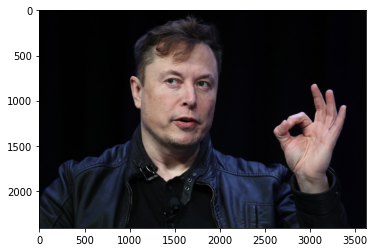

In [43]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow

img_path = '/content/drive/MyDrive/model_Training/dataset/elonmusk/1.jpg'

img = image.load_img(img_path, target_size=(300, 300))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [44]:
print(model.predict(x))

[[1. 0.]]


In [45]:
y=model.predict(x)
if y[0][0]==1.0:
  print('The image is of Elon musk')
else:
  print('The image is of Mark zuckerberg')

The image is of Elon musk
